# Air Quality in Beijing

## Initial Data Exploration and Cleaning

In [1]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 1
# Author:      Erick Rico
# Created:     03/08/2025
#-----------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data-pm2.5.csv")

In [4]:
df["full_date"] = pd.to_datetime(df[["year", "month", "day"]])

In [5]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir', 'full_date'],
      dtype='object')

In [6]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,full_date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


In [7]:
df.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,full_date
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0,2014-12-31


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         43824 non-null  int64         
 1   year       43824 non-null  int64         
 2   month      43824 non-null  int64         
 3   day        43824 non-null  int64         
 4   hour       43824 non-null  int64         
 5   pm2.5      41757 non-null  float64       
 6   DEWP       43824 non-null  int64         
 7   TEMP       43824 non-null  float64       
 8   PRES       43824 non-null  float64       
 9   cbwd       43824 non-null  object        
 10  Iws        43824 non-null  float64       
 11  Is         43824 non-null  int64         
 12  Ir         43824 non-null  int64         
 13  full_date  43824 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 4.7+ MB


In [9]:
print(type(df["full_date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,full_date
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,2012-07-01 12:00:00
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,2010-01-01 00:00:00
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,2011-04-02 00:00:00
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,2012-07-01 12:00:00
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,2013-10-01 00:00:00
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,2014-12-31 00:00:00
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,NaN


In [11]:
freq_nan = df.isnull().sum()
freq_nan

No              0
year            0
month           0
day             0
hour            0
pm2.5        2067
DEWP            0
TEMP            0
PRES            0
cbwd            0
Iws             0
Is              0
Ir              0
full_date       0
dtype: int64

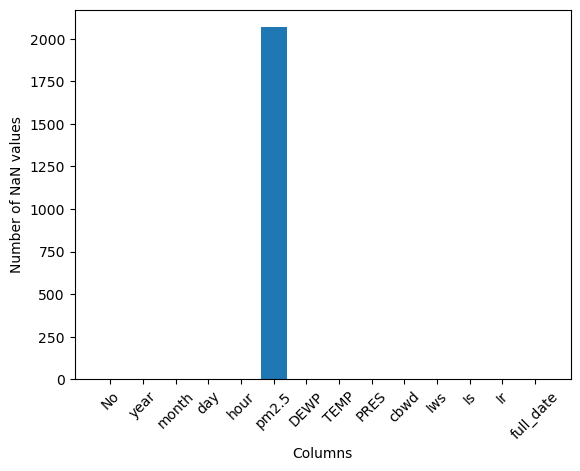

In [12]:
plt.bar(df.columns, freq_nan)
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.xticks(rotation=45)
plt.show()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df = df.rename(columns = {
    "DEWP": "dew_point",
    "TEMP": "temperature",
    "PRES": "pressure",
    "cbwd": "comb_wind_dir",
    "Iws": "cum_wind_speed",
    "Is": "cum_snow_hr",
    "Ir": "cum_rain_hr",
})

df

,No,year,month,day,hour,pm2.5,dew_point,temperature,pressure,comb_wind_dir,cum_wind_speed,cum_snow_hr,cum_rain_hr,full_date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31


---

In [15]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 2
# Author:      Erick Rico
# Created:     04/08/2025
#-----------------------------------------------------------------------------------------

In [16]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'dew_point',
       'temperature', 'pressure', 'comb_wind_dir', 'cum_wind_speed',
       'cum_snow_hr', 'cum_rain_hr', 'full_date'],
      dtype='object')

In [17]:
clean_df = df[["full_date", "pm2.5", "temperature", "pressure"]].copy()
clean_df

,full_date,pm2.5,temperature,pressure
0,2010-01-01,NaN,-11.0,1021.0
1,2010-01-01,NaN,-12.0,1020.0
2,2010-01-01,NaN,-11.0,1019.0
3,2010-01-01,NaN,-14.0,1019.0
4,2010-01-01,NaN,-12.0,1018.0
...,...,...,...,...
43819,2014-12-31,8.0,-2.0,1034.0
43820,2014-12-31,10.0,-3.0,1034.0
43821,2014-12-31,10.0,-3.0,1034.0
43822,2014-12-31,8.0,-4.0,1034.0


In [18]:
clean_df[clean_df["pm2.5"].isnull()].head(50)

,full_date,pm2.5,temperature,pressure
0,2010-01-01,NaN,-11.0,1021.0
1,2010-01-01,NaN,-12.0,1020.0
2,2010-01-01,NaN,-11.0,1019.0
3,2010-01-01,NaN,-14.0,1019.0
4,2010-01-01,NaN,-12.0,1018.0
5,2010-01-01,NaN,-10.0,1017.0
6,2010-01-01,NaN,-9.0,1017.0
7,2010-01-01,NaN,-9.0,1017.0
8,2010-01-01,NaN,-9.0,1017.0
9,2010-01-01,NaN,-8.0,1017.0


In [19]:
jan_2010 = clean_df[(clean_df["full_date"] >= "2010-01-01") 
                    & (clean_df["full_date"] <= "2010-01-31")]
jan_2010

,full_date,pm2.5,temperature,pressure
0,2010-01-01,NaN,-11.0,1021.0
1,2010-01-01,NaN,-12.0,1020.0
2,2010-01-01,NaN,-11.0,1019.0
3,2010-01-01,NaN,-14.0,1019.0
4,2010-01-01,NaN,-12.0,1018.0
...,...,...,...,...
739,2010-01-31,54.0,-1.0,1025.0
740,2010-01-31,71.0,-1.0,1025.0
741,2010-01-31,129.0,-1.0,1026.0
742,2010-01-31,145.0,-2.0,1027.0


In [20]:
jan_2010.isnull().sum()

full_date       0
pm2.5          91
temperature     0
pressure        0
dtype: int64

In [21]:
clean_jan_2010 = jan_2010.fillna(jan_2010["pm2.5"].mean())
clean_jan_2010

,full_date,pm2.5,temperature,pressure
0,2010-01-01,90.442573,-11.0,1021.0
1,2010-01-01,90.442573,-12.0,1020.0
2,2010-01-01,90.442573,-11.0,1019.0
3,2010-01-01,90.442573,-14.0,1019.0
4,2010-01-01,90.442573,-12.0,1018.0
...,...,...,...,...
739,2010-01-31,54.000000,-1.0,1025.0
740,2010-01-31,71.000000,-1.0,1025.0
741,2010-01-31,129.000000,-1.0,1026.0
742,2010-01-31,145.000000,-2.0,1027.0


In [22]:
clean_jan_2010.isnull().sum()

full_date      0
pm2.5          0
temperature    0
pressure       0
dtype: int64

In [23]:
clean_df.update(clean_jan_2010)
clean_df

,full_date,pm2.5,temperature,pressure
0,2010-01-01,90.442573,-11.0,1021.0
1,2010-01-01,90.442573,-12.0,1020.0
2,2010-01-01,90.442573,-11.0,1019.0
3,2010-01-01,90.442573,-14.0,1019.0
4,2010-01-01,90.442573,-12.0,1018.0
...,...,...,...,...
43819,2014-12-31,8.000000,-2.0,1034.0
43820,2014-12-31,10.000000,-3.0,1034.0
43821,2014-12-31,10.000000,-3.0,1034.0
43822,2014-12-31,8.000000,-4.0,1034.0


In [24]:
# Boolean mask
mar_2010 = (clean_df["full_date"] >= "2010-03-01") & (clean_df["full_date"] <= "2010-03-31")

# Selects only rows from march 2010 in column pm2.5, and replaces NaN with the avg of pm2.5 in that same month
clean_df.loc[mar_2010, "pm2.5"] = clean_df.loc[mar_2010, "pm2.5"].fillna(clean_df.loc[mar_2010, "pm2.5"].mean())

In [25]:
clean_df.loc[mar_2010, "pm2.5"]

1416     69.0
1417     59.0
1418     42.0
1419     35.0
1420     35.0
        ...  
2155    149.0
2156    113.0
2157     85.0
2158     71.0
2159     42.0
Name: pm2.5, Length: 744, dtype: float64

In [26]:
clean_df.loc[mar_2010, "pm2.5"].isna().sum()

np.int64(0)

In [27]:
clean_df.loc[mar_2010, "pm2.5"].tail(50)

2110    317.000000
2111    297.000000
2112    288.000000
2113    288.000000
2114    254.000000
2115    254.000000
2116    248.000000
2117    271.000000
2118     94.100141
2119     94.100141
2120     94.100141
2121     94.100141
2122     94.100141
2123     94.100141
2124     94.100141
2125    195.000000
2126     94.100141
2127     94.100141
2128     94.100141
2129     94.100141
2130     94.100141
2131     94.100141
2132     94.100141
2133     94.100141
2134     94.100141
2135     94.100141
2136     94.100141
2137     94.100141
2138     94.100141
2139     94.100141
2140     94.100141
2141     94.100141
2142     94.100141
2143    124.000000
2144    129.000000
2145     94.100141
2146     94.100141
2147     94.100141
2148     94.100141
2149     94.100141
2150     94.100141
2151     94.100141
2152     94.100141
2153    200.000000
2154    187.000000
2155    149.000000
2156    113.000000
2157     85.000000
2158     71.000000
2159     42.000000
Name: pm2.5, dtype: float64

In [28]:
for year in clean_df["full_date"].dt.year.unique():
    for month in clean_df["full_date"].dt.month.unique():
        mask = (clean_df["full_date"].dt.year == year) & (clean_df["full_date"].dt.month == month)
        if clean_df.loc[mask, "pm2.5"].isna().sum() > 0:
            clean_df.loc[mask, "pm2.5"] = clean_df.loc[mask, "pm2.5"].fillna(clean_df.loc[mask, "pm2.5"].mean())

In [29]:
# # 1. Iterar solo sobre las combinaciones de año y mes que realmente existen en el DataFrame
# for year, month in clean_df[["full_date"]].assign(
#         year=clean_df["full_date"].dt.year, 
#         month=clean_df["full_date"].dt.month
#     ).drop_duplicates(subset=["year", "month"])[["year", "month"]].values:
#     mask = (clean_df["full_date"].dt.year == year) & (clean_df["full_date"].dt.month == month)
#     if clean_df.loc[mask, "pm2.5"].isna().sum() > 0:
#         clean_df.loc[mask, "pm2.5"] = clean_df.loc[mask, "pm2.5"].fillna(clean_df.loc[mask, "pm2.5"].mean())

# # 2. Iterar solo sobre los meses donde realmente hay al menos un NaN en "pm2.5"
# for year, month in clean_df[clean_df["pm2.5"].isna()].assign(
#         year=clean_df["full_date"].dt.year, 
#         month=clean_df["full_date"].dt.month
#     ).drop_duplicates(subset=["year", "month"])[["year", "month"]].values:
#     mask = (clean_df["full_date"].dt.year == year) & (clean_df["full_date"].dt.month == month)
#     clean_df.loc[mask, "pm2.5"] = clean_df.loc[mask, "pm2.5"].fillna(clean_df.loc[mask, "pm2.5"].mean())

In [30]:
clean_df

,full_date,pm2.5,temperature,pressure
0,2010-01-01,90.442573,-11.0,1021.0
1,2010-01-01,90.442573,-12.0,1020.0
2,2010-01-01,90.442573,-11.0,1019.0
3,2010-01-01,90.442573,-14.0,1019.0
4,2010-01-01,90.442573,-12.0,1018.0
...,...,...,...,...
43819,2014-12-31,8.000000,-2.0,1034.0
43820,2014-12-31,10.000000,-3.0,1034.0
43821,2014-12-31,10.000000,-3.0,1034.0
43822,2014-12-31,8.000000,-4.0,1034.0


In [31]:
clean_df.sample()

,full_date,pm2.5,temperature,pressure
18466,2012-02-09,84.0,-3.0,1028.0


In [32]:
clean_df.to_csv("clean_df.csv", index=False)

In [33]:
print(clean_df["full_date"].head(10))           
clean_df["full_date"].diff().value_counts()

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
5   2010-01-01
6   2010-01-01
7   2010-01-01
8   2010-01-01
9   2010-01-01
Name: full_date, dtype: datetime64[ns]


full_date
0 days    41998
1 days     1825
Name: count, dtype: int64